In [1]:
import time
import torch
import sys
import os

project_path = os.path.abspath(os.path.join(os.getcwd(), '..', ''))
sys.path.append(project_path)

from python.create_dgl_dataset import TelemacDataset

from modulus.launch.utils import load_checkpoint, save_checkpoint
from python.CustomMeshGraphNet import MeshGraphNet


In [2]:
from hydra.utils import to_absolute_path

In [3]:
dataset = TelemacDataset(
            name="telemac_train",
            data_dir=to_absolute_path('./data/TetQ2500inter_1min_chunk/TetQ2500inter_1min_base.bin'),
            dynamic_data_file= to_absolute_path('./data/TetQ2500inter_1min_chunk/TetQ2500inter_1min_0_0-500.pkl'),
            split="train",
            num_samples=1,
            num_steps=30
        )

{'h': tensor([0.0881]), 'u': tensor([0.0130]), 'v': tensor([-0.0005]), 'strickler': tensor([20.6628]), 'z': tensor([17.5927]), 'delta_h': tensor([0.0028]), 'delta_u': tensor([0.0011]), 'delta_v': tensor([0.0002]), 'h_std': tensor([0.3978]), 'u_std': tensor([0.2398]), 'v_std': tensor([0.1134]), 'strickler_std': tensor([11.6977]), 'z_std': tensor([13.9988]), 'delta_h_std': tensor([0.0536]), 'delta_u_std': tensor([0.0769]), 'delta_v_std': tensor([0.0420])}
{'xrel': tensor([0.]), 'yrel': tensor([0.]), 'norm': tensor([15.7447]), 'xrel_std': tensor([15.7152]), 'yrel_std': tensor([15.7621]), 'norm_std': tensor([15.7327])}
strickler
z
xrel
yrel
norm


In [4]:
model = MeshGraphNet(
            9,
            3,
            3,
            processor_size=3,
            hidden_dim_processor=128,
            hidden_dim_node_encoder=128,
            hidden_dim_edge_encoder=128,
            hidden_dim_node_decoder=128,
            do_concat_trick=True
        )

In [5]:
load_checkpoint(to_absolute_path("./data/checkpoints_Tet_sample"),model)

[09:11:05 - checkpoint - INFO] Loaded model state dictionary /users/daml/vmercier/gnn_modulus_project/data/checkpoints_Tet_sample/MeshGraphNet.0.3.mdlus to device cpu
[09:11:05 - checkpoint - INFO] Loaded checkpoint file /users/daml/vmercier/gnn_modulus_project/data/checkpoints_Tet_sample/checkpoint.0.3.pt to device cpu


3

In [38]:
ts = 0
with torch.no_grad():
    pred = model(dataset[ts].ndata['x'],dataset[0].edata['x'],dataset[0]).numpy()
groundtruth = dataset[ts].ndata['y'].numpy()

In [39]:
from python.create_dgl_dataset import add_mesh_info
from python.python_code.data_manip.extraction.telemac_file import TelemacFile

import dgl
graphs, _ = dgl.load_graphs('./data/TetQ2500inter_1min_chunk/TetQ2500inter_1min_base.bin') 
mesh_list = ['/projets/aniti-daml/vmercier/simu_valentin/maillage_3.slf']
res_mesh = TelemacFile(mesh_list[0])
X,triangles = add_mesh_info(res_mesh)

In [40]:
import numpy as np 

In [41]:
h_max = max(np.max(groundtruth[:,0]),np.max(pred[:,0]))
h_min = min(np.min(groundtruth[:,0]),np.min(pred[:,0]))

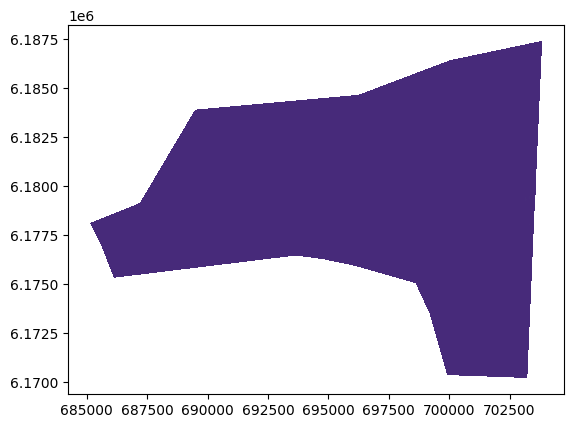

In [36]:
import matplotlib.pyplot as plt
plt.figure()
plt.tripcolor(X[:,0],X[:,1],pred[:,0],triangles=triangles,vmax=h_max,vmin=h_min)
plt.show()

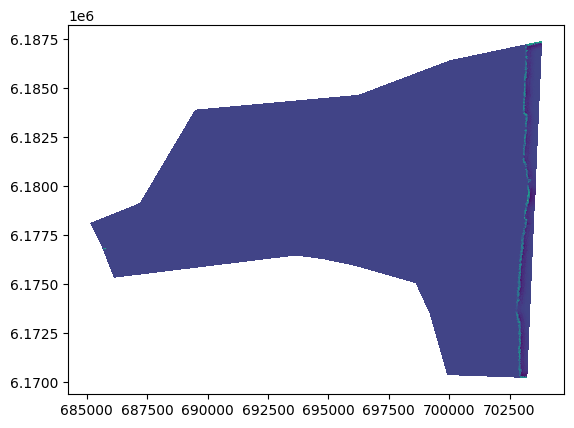

In [42]:
plt.figure()
plt.tripcolor(X[:,0],X[:,1],groundtruth[:,0],triangles=triangles,vmax=h_max,vmin=h_min)
plt.show()